# Chapter 2. Linear Algebra

* vectors are special objects

```julia
import Pkg; Pkg.add("LinearAlgebra")
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("Polynomials")
```

In [1]:
using LinearAlgebra, Plots, Polynomials, LaTeXStrings

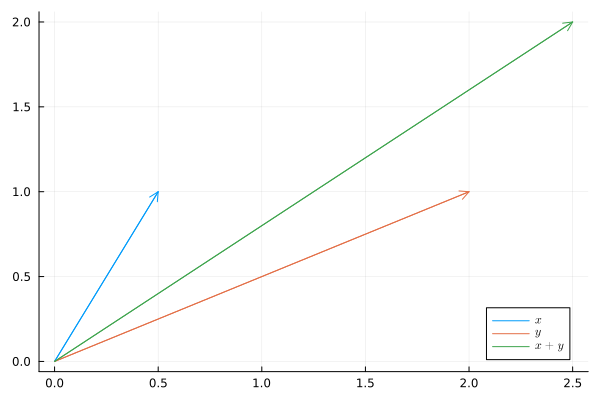

In [2]:
# geometric vectors
x = [0.5, 1]
y = [2, 1]

# plot vectors in Julia
plot([0, x[1]], [0, x[2]], arrow = true, label = L"x")
plot!([0, y[1]], [0, y[2]], arrow = true, label = L"y")
plot!([0, x[1] + y[1]], [0, x[2] + y[2]], arrow = true, label = L"x + y")
plot!(legend = :bottomright)

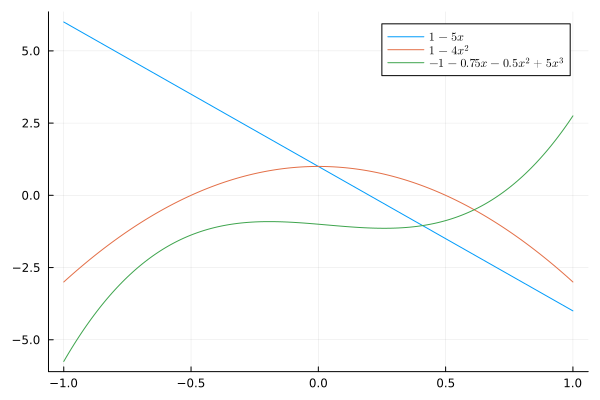

In [3]:
# polynomial vectors coefficients
x1 = [ 1,    -5,    0, 0]
x2 = [ 1,     0,   -4, 0]
x3 = [-1, -0.75, -0.5, 5]

# iterate x1, x2, x3 create polynomial vectors
plt = plot(legend=true)
xx = -1:0.01:1
for (i, x) in enumerate([x1, x2, x3])
    # create polynomial function
    x_poly = Polynomial(x)
    # evaluate polynomial function
    yy = x_poly.(xx)
    # plot polynomial function
    eq = replace(string(x_poly), "*" => " ", ".0" => "")
    plot!(xx, yy, label=latexstring("$(eq)"))
end
display(plt)

┌ Warning: UnitfulRecipes has been deprecated.
│ 
│ ```
│ using Unitful, Plots
│ ```
│ should suffice to plot unitful data.
└ @ UnitfulRecipes /home/simonjisu/.julia/packages/UnitfulRecipes/R6doQ/src/UnitfulRecipes.jl:10


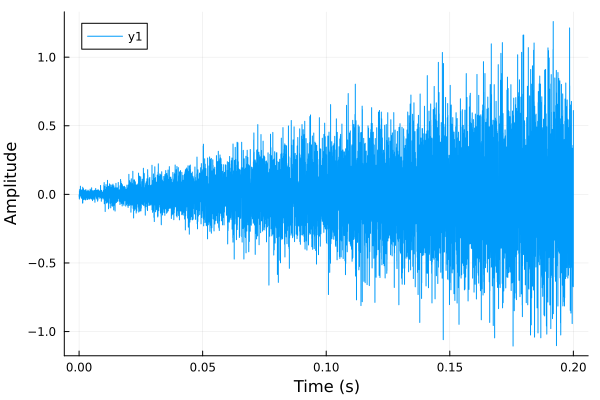

In [4]:
using AuditoryStimuli, Unitful, Pipe, DSP
# tutorial from: https://docs.juliahub.com/AuditoryStimuli/FsDCQ/0.0.6/realtime-introduction/
sample_rate = 48u"kHz"
audio_channels = 1
source_rms = 0.4

source = NoiseSource(Float64, sample_rate, audio_channels, source_rms)
sink = DummySampleSink(Float64, sample_rate, audio_channels)
amp = Amplification(current=0.0, target=1.0, change_limit=0.05)
for frame = 1:20
    @pipe read(source, 0.01u"s") |> modify(amp, _) |> write(sink, _)
end
plot(sink)

In [5]:
# elements of R^n
a = [[1], [2], [3]]

println(a)
println("The shape of a: ", size(a))

[[1], [2], [3]]
The shape of a: (3,)


## 2.1 Systems of Linear Equations

$$\begin{aligned}
a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n &= b_1 \\
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n &= b_2 \\
\vdots \qquad \qquad  \\
a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n &= b_m
\end{aligned}$$

* Unknowns: $x_1, x_2, \cdots, x_n$
* $n$-tuple $(x_1, x_2, \cdots, x_n) \in \Bbb{R}^n$ is a solution if it satisfies all $m$ equations
* Coefficients: $a_{ij} \in \Bbb{R}$ for $i = 1, \cdots, m$ and $j = 1, \cdots, n$

Rewrite the system in column form:

$$\begin{bmatrix}a_{11} \\ a_{21} \\ \vdots \\ a_{m1}\end{bmatrix}x_1 + \begin{bmatrix}a_{12} \\ a_{22} \\ \vdots \\ a_{m2}\end{bmatrix}x_2 + \cdots + \begin{bmatrix}a_{1n} \\ a_{2n} \\ \vdots \\ a_{mn}\end{bmatrix}x_n = \begin{bmatrix}b_1 \\ b_2 \\ \vdots \\ b_m\end{bmatrix}$$

Rewrite the system in matrix form:

$$\begin{bmatrix}a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn}\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_n\end{bmatrix} = \begin{bmatrix}b_1 \\ b_2 \\ \vdots \\ b_m\end{bmatrix}$$

* $m \times n$ matrix $A$ is called the **coefficient matrix**

In [32]:
using LinearSolve, RowEchelon
# example of linear equations
# case1: no solution since
A = Float64[1 1 1; 1 -1 2; 2 0 3]
b = Float64[3, 2, 5]
println("The rank of matrix A: ", rank(A))
println("The rank of augmented matrix [A b]: ", rank([A b]))
println("The Reduced Row Echelon Form of [A b]: ")

The rank of matrix A: 2
The rank of augmented matrix [A b]: 2
The Reduced Row Echelon Form of [A b]: 


In [33]:
display(rref([A b]))   # the last row does not have pivot, that means give us no further information

3×4 Matrix{Float64}:
 1.0  0.0   1.5  2.5
 0.0  1.0  -0.5  0.5
 0.0  0.0   0.0  0.0

In [34]:
println(A \ b)  # no singular solution

SingularException: SingularException(3)

* We can remove the redundant thrid equation and write the system as:

$$\begin{aligned}
x_1 + x_2 + x_3 & = 3 \\
x_1 - x_2 + 2x_3 & = 2
\end{aligned}$$

* From the equations, we can get $2x_1 = 5-3x_3$ and $2x_2 = 1+x_3$. if we defind $x_3 = a \in \Bbb{R}$ as a free variable:

    $$\begin{pmatrix} \frac{5}{2} - \frac{3}{2}a,  \frac{1}{2} + \frac{1}{2}a, a \end{pmatrix}, a \in \Bbb{R}$$ 

    is a solution of the system of linear equations. We have infinite solutions.

## 2.2 Matrices